In [10]:
using PyPlot
include("./src/fdfd.jl");
include("./src/yeeder.jl");
include("./src/calcpml_2d.jl");

In [11]:
num_trials = 1;
ns = (500);
N = length(ns);
times = zeros(N,num_trials);

In [12]:
for j in (1:num_trials)
    println(j/num_trials*100);
    for i in (1:N)
        println(j/num_trials*100);
        println(i);
        n = div(Int(ns[i]),1);
        tic();
        BC = [0,0];
        Nx2 = n;          
        Ny2 = n;
        Nx = div(Nx2,2);     Ny = div(Ny2,2);
        ER2  = ones(Complex64,Nx2,Ny2);
        ER2[div(Nx*1,3):div(Nx*2,3),div(Ny*1,3):div(Ny*2,3)] = 7.0;
        MUR2 = ones(Complex64,Nx2,Ny2);
        RES  = [1e-9,1e-9];
        NPML = [40 40 40 40]
        lambda0 = 50e-9;
        Pol = "Ez";
        theta = 0;
        Q = zeros(Int,Nx,Ny);
        Q[40:Nx-40,40:Ny-40] = 1;
        (Ex,Ey,Ez,Hx,Hy,Hz) = fdfd(ER2,MUR2,RES,NPML,BC,lambda0,Pol,theta,Q);
        time = toc();
        times[i,j] = time;
    end
end

100.0
100.0
1
elapsed time: 1

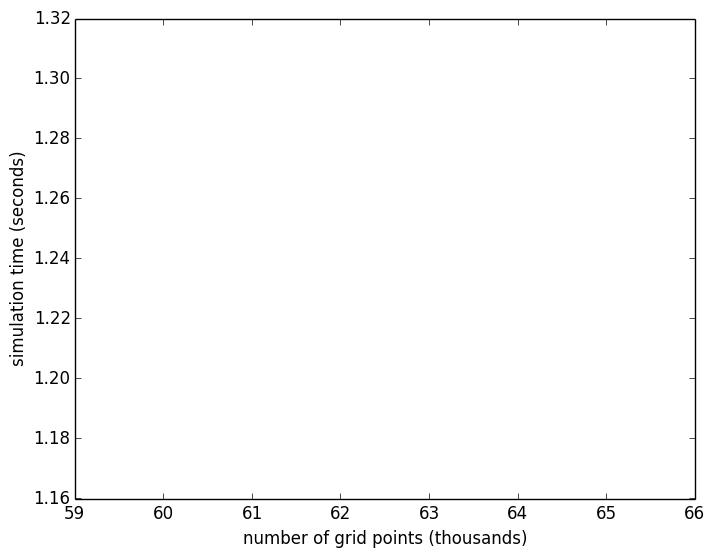

PyObject <matplotlib.text.Text object at 0x31ecfe610>

In [14]:
plot((ns.*ns/4)/1000,times)
xlabel("number of grid points (thousands)")
ylabel("simulation time (seconds)")

In [11]:
ns*2

200:40:1600

In [4]:
println(times)


[1.878249763 0.145543345 0.153649424 0.147184539 0.165707417 0.155556027 0.147218389 0.1480155 0.151897374 0.144223151
 0.243362226 0.19399764 0.194891285 0.196806632 0.20302851 0.19442805 0.196003969 0.195499104 0.196183472 0.190849242
 0.325308072 0.503428906 0.506109567 0.506462787 0.526145977 0.503185648 0.511877283 0.51105227 0.506858717 0.505395443
 0.411198847 0.390951613 0.382025169 0.380051359 0.388048356 0.380154256 0.379317837 0.381858582 0.392179708 0.383221811
 0.614627288 0.535768707 0.559470656 0.544009216 0.561580613 0.53819304 0.543653465 0.53845431 0.539251846 0.539717757
 0.754923364 0.664740655 0.650381444 0.644351627 0.657310556 0.643719019 0.645819943 0.647885212 0.643233882 0.647058561
 0.783442264 1.001349346 0.787944777 0.791090662 0.857802016 0.784516326 0.786361715 0.799731193 0.791081859 0.788333684
 0.970468102 1.185600089 0.991294753 0.987563349 1.122474212 0.97470061 0.99127504 0.982363521 0.977782704 0.974026935
 1.236716608 1.41683614 1.15357807 1.18244

In [ ]:
println(times)
